<a href="https://www.kaggle.com/code/patrickreiners/the-biggest-loser?scriptVersionId=101345203" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
#my first own sports analytics project in general and kaggle!

import pandas as pd 
import pandasql as ps

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/superbowl-history-1967-2020/superbowl.csv


These are the biggest Loser in Super Bowl History.They never ever won the final but lost x times!


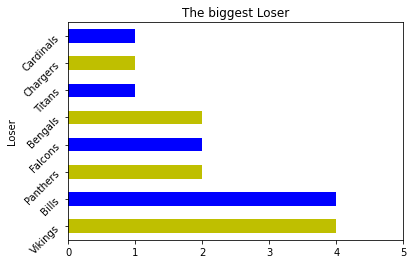

In [2]:

superbowl = pd.read_csv(os.path.join(dirname,filename))

#remove City from Teamname to make sure that also teams after a move get calculated (For e.g. Rams or Raiders)
superbowl['Loser'] = [x.split(' ')[-1] for x in superbowl['Loser']]
superbowl['Winner'] = [x.split(' ')[-1] for x in superbowl['Winner']]

#Query Team that only lost and never won
sql_q = '''
    SELECT Loser, COUNT(Loser) AS Count
    FROM superbowl
    WHERE Loser NOT IN
        (SELECT Winner 
         FROM superbowl)
    GROUP BY Loser
    ORDER BY Count DESC
'''
df = (ps.sqldf(sql_q, locals()))

#Plot the result
df.plot(kind='barh', x='Loser',  y='Count',xlim=(0,5), color=['y','b'], legend=False, rot=45, title='The biggest Loser')
print('These are the biggest Loser in Super Bowl History.They never ever won the final but lost x times!')